# Group Project 2
### Code: by Rishi Gummakonda


### Objectives for the Data Analysis Portion
1. Leverage marketing response model based on regression analysis

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,mean_absolute_error,
                             mean_squared_error,explained_variance_score,r2_score,
                            confusion_matrix,precision_score, recall_score, f1_score)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [3]:
from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
path ='/Users/rishigummakonda/Desktop/MKT 325/Travel-Data.xls'

#Organic Visit（Owned Media)
owned = pd.read_excel(path, header = 1, usecols="A:E")

#Cooperative Sites (Earned Media) Table
earned = pd.read_excel(path, header = 1, usecols="A,F:I")

#Search Visit (Paid Media) Table
paid = pd.read_excel(path, header = 1, usecols="A,J:M")

#Internal Community Table
internal = pd.read_excel(path, header = 1, usecols="A,N:Q")

#Mobile Table
mobile = pd.read_excel(path, header = 1, usecols="A,R:U")

#Revenue and Advertising Tables 
#In one table for simplicity
finances = pd.read_excel(path, header = 1, usecols="A,V")

unique_visitors = pd.read_excel(path, header = 1, usecols="A,B,F,J,N,R")
unique_pgviews = pd.read_excel(path, header = 1, usecols="A,C,G,K,O,S")
avgtime_onpg = pd.read_excel(path, header = 1, usecols="A,D,H,L,P,T")
bounce_rate = pd.read_excel(path, header = 1, usecols="A,E,I,M,Q,U")

In [5]:
#Renaming columns
owned.columns = ["date", "owned_visitors", "owned_pgviews", "owned_avgtime", "owned_br"]
earned.columns = ["date", "earned_visitors", "earned_pgviews", "earned_avgtime", "earned_br"]
paid.columns = ["date", "paid_visitors", "paid_pgviews", "paid_avgtime", "paid_br"]
internal.columns = ["date", "internal_visitors", "internal_pgviews", "internal_avgtime", "internal_br"]
mobile.columns = ["date", "mobile_visitors", "mobile_pgviews", "mobile_avgtime", "mobile_br"]

#Changed "Online+offline" to total_revenue, and "Investment" to total_cost for simplicity
finances.columns = ["date", "on_rev"]

unique_visitors.columns = ["date","owned","earned","paid","internal","mobile"]
unique_pgviews.columns = ["date","owned","earned","paid","internal","mobile"]
avgtime_onpg.columns = ["date","owned","earned","paid","internal","mobile"]
bounce_rate.columns = ["date","owned","earned","paid","internal","mobile"]


mobile['mobile_visitors'] = mobile['mobile_visitors'].fillna(0)
mobile['mobile_pgviews'] = mobile['mobile_pgviews'].fillna(0)
mobile['mobile_avgtime'] = mobile['mobile_avgtime'].fillna(0)
mobile['mobile_br'] = mobile['mobile_br'].fillna(0)

owned_finances = pd.merge(owned,finances)
earned_finances = pd.merge(earned,finances)
paid_finances = pd.merge(paid,finances)
internal_finances = pd.merge(internal,finances)
mobile_finances = pd.merge(mobile,finances)

unique_visitors_finances = pd.merge(unique_visitors,finances)
unique_pgviews_finances = pd.merge(unique_pgviews,finances)
avgtime_onpg_finances = pd.merge(avgtime_onpg,finances)
bounce_rate_finances = pd.merge(bounce_rate,finances)

t1 = pd.merge(owned,earned)
t2 = pd.merge(t1,paid)
t3= pd.merge(t2,internal)
t4 = pd.merge(t3,mobile)
bigtable = pd.merge(t4,finances)
bigtable.head()

,date,owned_visitors,owned_pgviews,owned_avgtime,owned_br,earned_visitors,earned_pgviews,earned_avgtime,earned_br,paid_visitors,...,paid_br,internal_visitors,internal_pgviews,internal_avgtime,internal_br,mobile_visitors,mobile_pgviews,mobile_avgtime,mobile_br,on_rev
0,2018-08-01,241294,820096,105.457414,0.433131,91338,235523,96.776953,0.547922,37177,...,0.473311,7713,25252,73.488751,0.243494,0.0,0.0,0.0,0.0,6311475
1,2018-08-02,255647,864326,103.978332,0.417829,98491,249249,94.918732,0.538760,36357,...,0.484812,7533,24134,73.243257,0.243802,0.0,0.0,0.0,0.0,6138000
2,2018-08-03,246990,841931,102.329678,0.429202,96275,245907,95.629137,0.541837,28480,...,0.521789,7301,23904,75.740536,0.233513,0.0,0.0,0.0,0.0,5839334
3,2018-08-04,202238,675169,97.733350,0.450557,79131,201669,90.698461,0.535145,22377,...,0.519872,5317,17580,74.482177,0.288106,0.0,0.0,0.0,0.0,5149912
4,2018-08-05,183800,612308,98.577034,0.451699,71025,183932,90.358881,0.546901,20816,...,0.511304,5024,16009,72.084543,0.267794,0.0,0.0,0.0,0.0,5856520


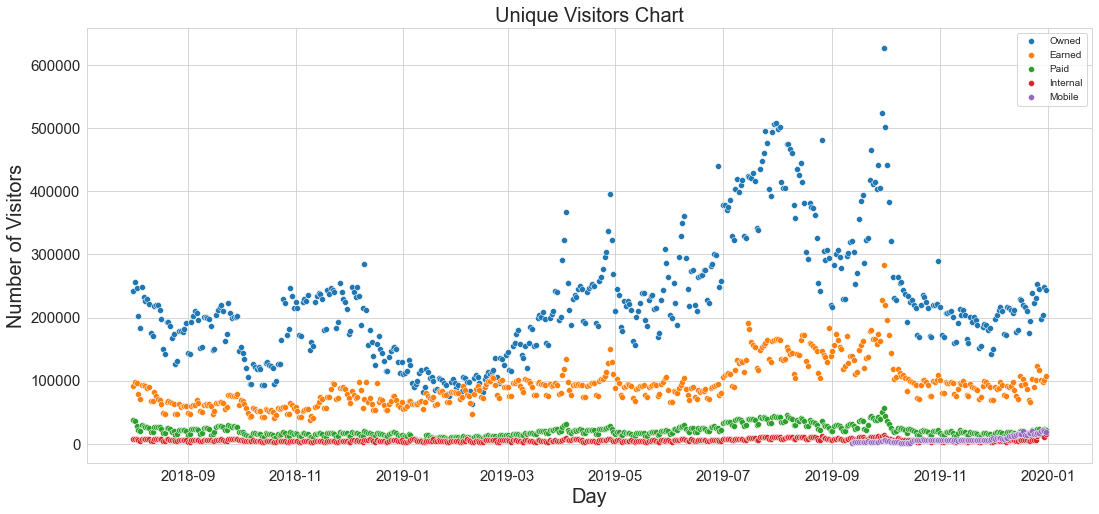

In [6]:
#Unique Visitors Cart
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.title('Unique Visitors Chart', fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('Number of Visitors',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1 = sns.scatterplot(x=unique_visitors['date'], y=unique_visitors['owned'], label="Owned")
ax1 = sns.scatterplot(x=unique_visitors['date'], y=unique_visitors['earned'], label = "Earned")
ax1 = sns.scatterplot(x=unique_visitors['date'], y=unique_visitors['paid'], label = "Paid")
ax1 = sns.scatterplot(x=unique_visitors['date'], y=unique_visitors['internal'], label = "Internal")
ax1 = sns.scatterplot(x=unique_visitors['date'], y=unique_visitors['mobile'], label = "Mobile")

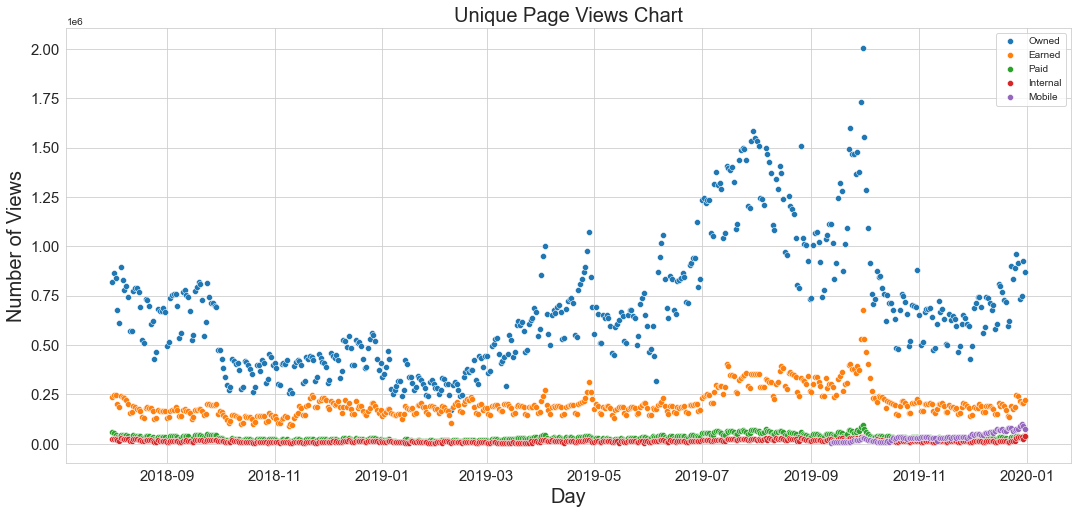

In [7]:
#Unique Pgviews Cart
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.title('Unique Page Views Chart', fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('Number of Views',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2 = sns.scatterplot(x=unique_visitors['date'], y=unique_pgviews['owned'], label="Owned")
ax2 = sns.scatterplot(x=unique_visitors['date'], y=unique_pgviews['earned'], label = "Earned")
ax2 = sns.scatterplot(x=unique_visitors['date'], y=unique_pgviews['paid'], label = "Paid")
ax2 = sns.scatterplot(x=unique_visitors['date'], y=unique_pgviews['internal'], label = "Internal")
ax2 = sns.scatterplot(x=unique_visitors['date'], y=unique_pgviews['mobile'], label = "Mobile")

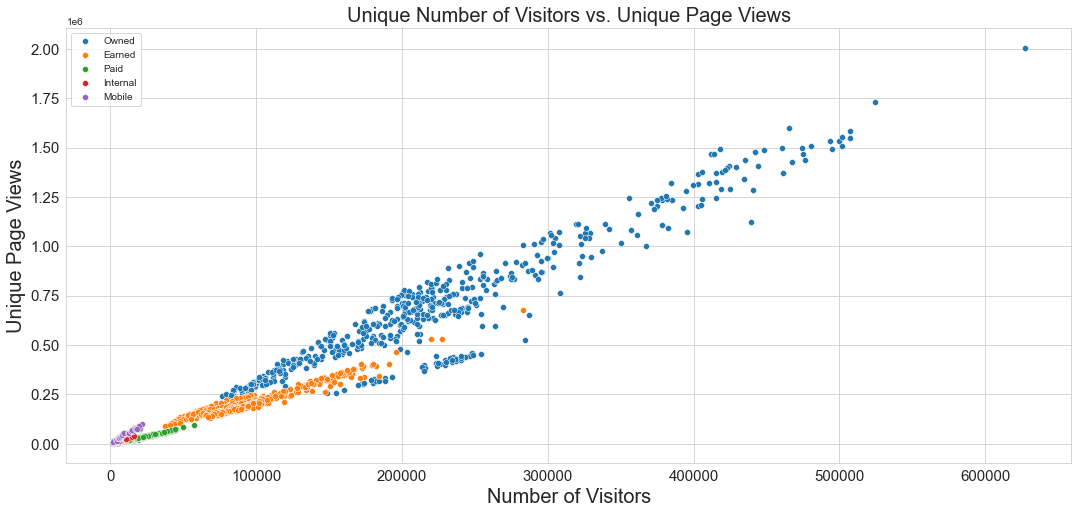

In [8]:
#Unique Visitors Cart
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.title('Unique Number of Visitors vs. Unique Page Views', fontsize=20)
plt.ylabel('Unique Page Views',fontsize=20)
plt.xlabel('Number of Visitors',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1 = sns.scatterplot(y=unique_pgviews['owned'], x=unique_visitors['owned'], label="Owned")
ax1 = sns.scatterplot(y=unique_pgviews['earned'], x=unique_visitors['earned'], label = "Earned")
ax1 = sns.scatterplot(y=unique_pgviews['paid'], x=unique_visitors['paid'], label = "Paid")
ax1 = sns.scatterplot(y=unique_pgviews['internal'], x=unique_visitors['internal'], label = "Internal")
ax1 = sns.scatterplot(y=unique_pgviews['mobile'], x=unique_visitors['mobile'], label = "Mobile")

owned Avg Time Spent 97.9218393251348
earned Avg Time Spent 101.92002123854762
paid Avg Time Spent 66.19882151677844
internal Avg Time Spent 90.12966642723357
mobile Avg Time Spent 40.13710754972136

owned bounce rate 0.4663177229099437
earned bounce rate 0.6166544647969392
paid bounce rate 0.5626847443503775
internal bounce rate 0.28119272373275606
mobile bounce rate 0.36081942967417424


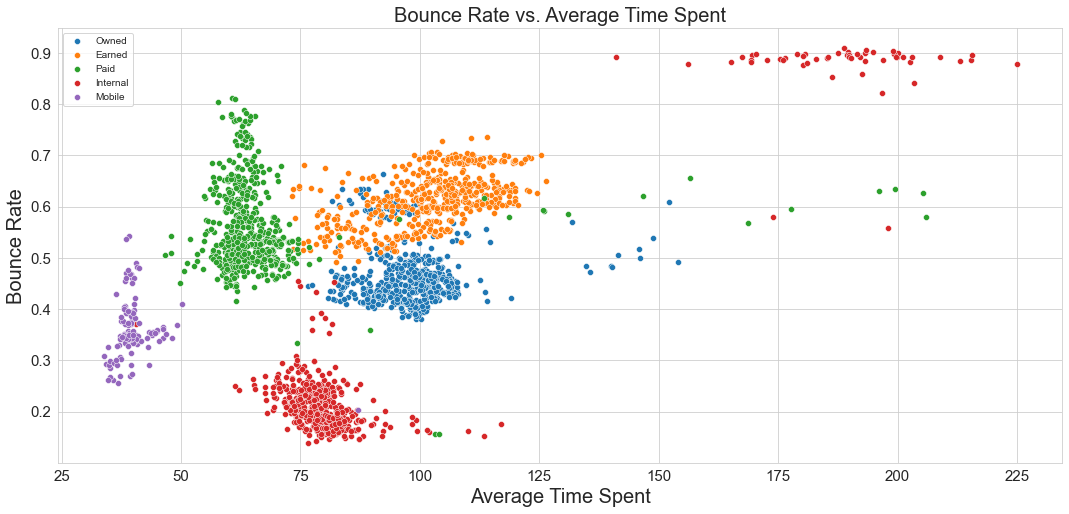

In [9]:
#Bounce Rate vs. Avg Time Spent
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.title('Bounce Rate vs. Average Time Spent', fontsize=20)
plt.xlabel('Average Time Spent',fontsize=20)
plt.ylabel('Bounce Rate',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2 = sns.scatterplot(x=avgtime_onpg['owned'], y=bounce_rate['owned'], label="Owned")
ax2 = sns.scatterplot(x=avgtime_onpg['earned'], y=bounce_rate['earned'], label = "Earned")
ax2 = sns.scatterplot(x=avgtime_onpg['paid'], y=bounce_rate['paid'], label = "Paid")
ax2 = sns.scatterplot(x=avgtime_onpg['internal'], y=bounce_rate['internal'], label = "Internal")
ax2 = sns.scatterplot(x=avgtime_onpg['mobile'], y=bounce_rate['mobile'], label = "Mobile")

print('owned Avg Time Spent',np.mean(avgtime_onpg['owned']))
print('earned Avg Time Spent',np.mean(avgtime_onpg['earned']))
print('paid Avg Time Spent',np.mean(avgtime_onpg['paid']))
print('internal Avg Time Spent',np.mean(avgtime_onpg['internal']))
print('mobile Avg Time Spent',np.mean(avgtime_onpg['mobile']))

print('\nowned bounce rate',np.mean(bounce_rate['owned']))
print('earned bounce rate',np.mean(bounce_rate['earned']))
print('paid bounce rate',np.mean(bounce_rate['paid']))
print('internal bounce rate',np.mean(bounce_rate['internal']))
print('mobile bounce rate',np.mean(bounce_rate['mobile']))


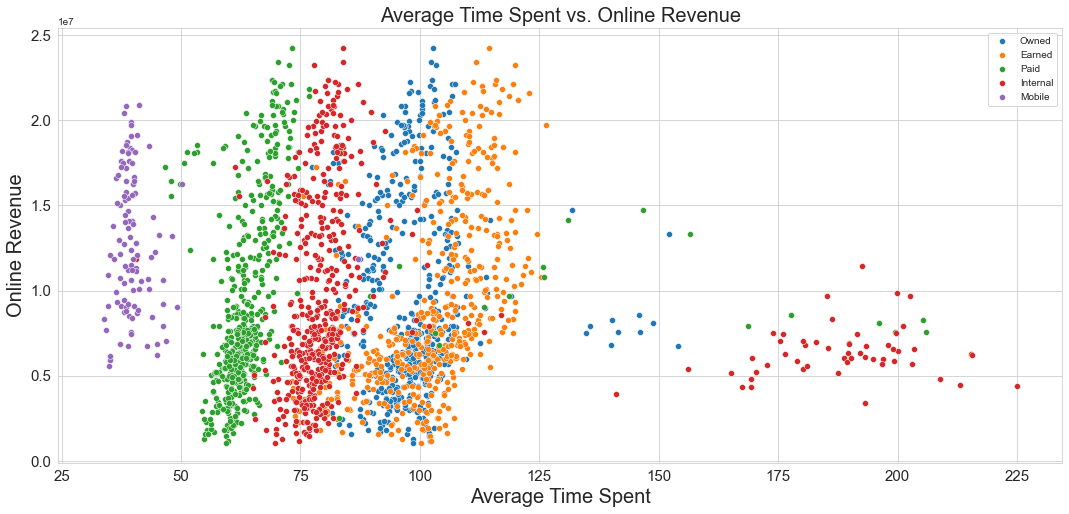

In [10]:
#Bounce Rate
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.title('Average Time Spent vs. Online Revenue', fontsize=20)
plt.xlabel('Average Time Spent',fontsize=20)
plt.ylabel('Online Revenue',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2 = sns.scatterplot(x=avgtime_onpg['owned'], y=finances['on_rev'], label="Owned")
ax2 = sns.scatterplot(x=avgtime_onpg['earned'], y=finances['on_rev'], label = "Earned")
ax2 = sns.scatterplot(x=avgtime_onpg['paid'], y=finances['on_rev'], label = "Paid")
ax2 = sns.scatterplot(x=avgtime_onpg['internal'], y=finances['on_rev'], label = "Internal")
ax2 = sns.scatterplot(x=avgtime_onpg['mobile'], y=finances['on_rev'], label = "Mobile")

In [11]:
corr1 = owned_finances.corr().round(3)
corr2 = earned_finances.corr().round(3)
corr3 = paid_finances.corr().round(3)
corr4 = internal_finances.corr().round(3)
corr5 = mobile_finances.corr().round(3)
corr6 = unique_visitors_finances.corr().round(3)
corr7 = unique_pgviews_finances.corr().round(3)
corr8 = avgtime_onpg_finances.corr().round(3)
corr9 = bounce_rate_finances.corr().round(3)

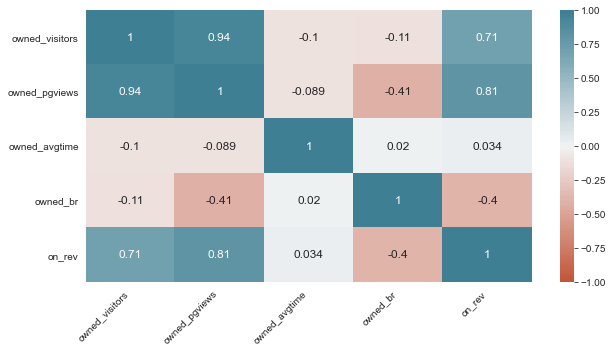

In [12]:
plt.figure(figsize=(10,5))
ax1 = sns.heatmap(corr1,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);
#use pgviews

In [13]:
lm = LinearRegression(fit_intercept=True)

In [14]:
y = owned_finances['on_rev']
x= owned_finances.drop(['on_rev','date','owned_visitors'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)

lm.fit(X_train, y_train)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

r2_score=lm.score(X_train, y_train)
print('R squared (linear regression)', r2_score)
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: -2614072.589404039
Number of coefficients: 3
R squared (linear regression) 0.6591879116591448


,features,estimatedCoefficients
0,owned_pgviews,1.252120e+01
1,owned_avgtime,7.392640e+04
2,owned_br,-8.377563e+06


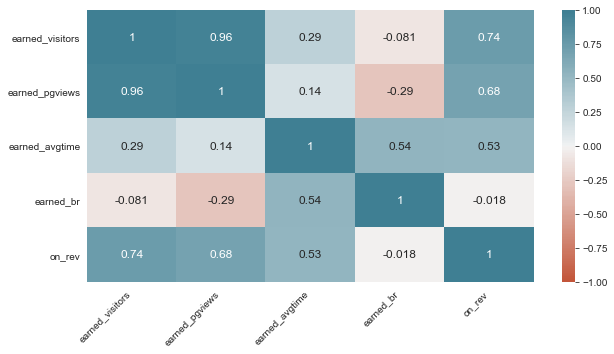

In [15]:
plt.figure(figsize=(10,5))
ax2 = sns.heatmap(corr2,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);
#use pgviews

In [16]:
y = earned_finances['on_rev']
x= earned_finances.drop(['date','earned_pgviews', "on_rev"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)

lm.fit(X_train, y_train)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

r2_score=lm.score(X_train, y_train)
print('R squared (linear regression)', r2_score)
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: -8659605.102013357
Number of coefficients: 3
R squared (linear regression) 0.6928867772244736


,features,estimatedCoefficients
0,earned_visitors,9.045103e+01
1,earned_avgtime,2.424593e+05
2,earned_br,-2.444546e+07


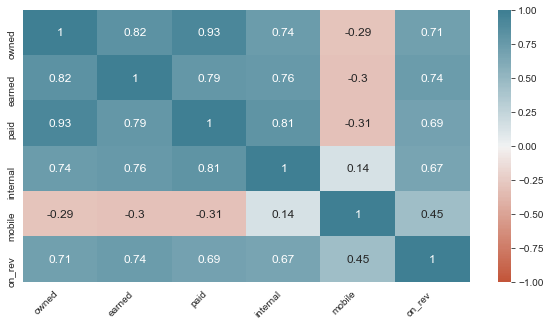

In [17]:
#Unique Visitors
plt.figure(figsize=(10,5))
ax6 = sns.heatmap(corr6,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);

In [18]:
y = bigtable['on_rev']
x= bigtable[['owned_visitors','paid_visitors','internal_visitors', 'earned_visitors','mobile_visitors']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
lm.fit(X_train, y_train)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

r2_score=lm.score(X_train, y_train)
print('R squared (linear regression)', r2_score)
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: -2068492.831548132
Number of coefficients: 5
R squared (linear regression) 0.6665110662063751


,features,estimatedCoefficients
0,owned_visitors,6.812886
1,paid_visitors,171.211705
2,internal_visitors,136.225766
3,earned_visitors,51.112037
4,mobile_visitors,455.322918


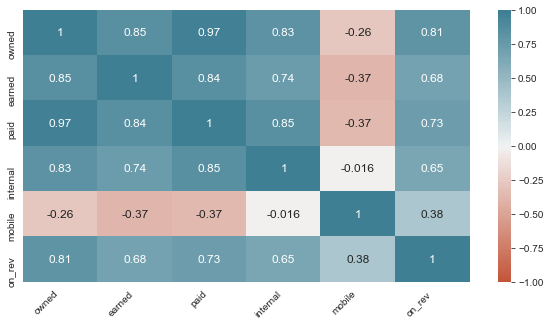

In [19]:
#Unique Page Views
plt.figure(figsize=(10,5))
ax7 = sns.heatmap(corr7,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);

In [20]:
y = bigtable['on_rev']
x= bigtable[['owned_pgviews','paid_pgviews','internal_pgviews', 'earned_pgviews','mobile_pgviews']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
lm.fit(X_train, y_train)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

r2_score=lm.score(X_train, y_train)
print('R squared (linear regression)', r2_score)
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: 439143.3983574379
Number of coefficients: 5
R squared (linear regression) 0.7124311896992502


,features,estimatedCoefficients
0,owned_pgviews,17.018812
1,paid_pgviews,-102.362974
2,internal_pgviews,-25.643123
3,earned_pgviews,1.055288
4,mobile_pgviews,78.551538


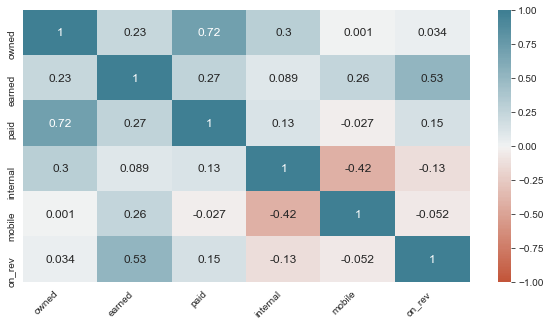

In [21]:
#AvgTime on Page
plt.figure(figsize=(10,5))
ax8 = sns.heatmap(corr8,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);

In [22]:
y = bigtable['on_rev']
x= bigtable[['owned_pgviews','paid_pgviews','internal_pgviews', 'earned_pgviews','mobile_pgviews',
             'owned_avgtime','earned_avgtime',
            'paid_avgtime', 'internal_avgtime','mobile_avgtime']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
lm.fit(X_train, y_train)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

r2_score=lm.score(X_train, y_train)
print('R squared (linear regression)', r2_score)
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: -19910492.428016815
Number of coefficients: 10
R squared (linear regression) 0.8086752639012404


,features,estimatedCoefficients
0,owned_pgviews,11.379270
1,paid_pgviews,-57.404433
2,internal_pgviews,-29.361478
3,earned_pgviews,15.884427
4,mobile_pgviews,121.432092
5,owned_avgtime,90208.790546
6,earned_avgtime,103676.952128
7,paid_avgtime,10848.444487
8,internal_avgtime,-4387.197780
9,mobile_avgtime,-26579.138723


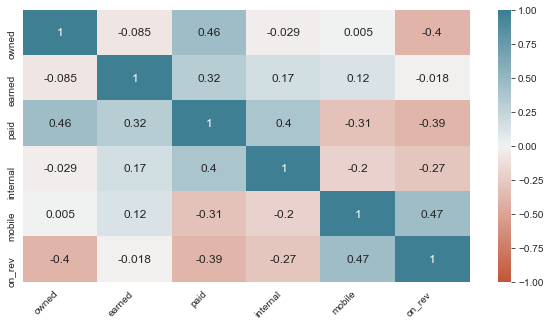

In [23]:
#BounceRate
plt.figure(figsize=(10,5))
ax9 = sns.heatmap(corr9,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);

In [24]:
#listing the correlation values
correlation_mat = bigtable.corr()

corr_pairs = correlation_mat.unstack()

#sorting
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#only looking at pairs that go with total revenue
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5][['on_rev']]
strong_pairs_no1 = strong_pairs[abs(sorted_pairs) < 1]

print(len(strong_pairs_no1))
print(strong_pairs_no1)

9
on_rev  earned_avgtime       0.526474
        internal_pgviews     0.649470
        internal_visitors    0.671180
        earned_pgviews       0.681514
        paid_visitors        0.692530
        owned_visitors       0.715069
        paid_pgviews         0.733856
        earned_visitors      0.741836
        owned_pgviews        0.806847
dtype: float64


In [25]:
#listing the correlation values
correlation_mat = bigtable.corr()

corr_pairs = correlation_mat.unstack()

#sorting
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#only looking at pairs that go with total revenue
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5][['owned_avgtime','earned_avgtime','paid_avgtime','internal_avgtime','mobile_avgtime']]
strong_pairs_no1 = strong_pairs[abs(sorted_pairs) < 1]

print(len(strong_pairs_no1))
print(strong_pairs_no1)

8
owned_avgtime     paid_avgtime       0.716590
earned_avgtime    on_rev             0.526474
                  earned_br          0.538217
paid_avgtime      owned_avgtime      0.716590
internal_avgtime  internal_br        0.933844
mobile_avgtime    mobile_visitors    0.790156
                  mobile_pgviews     0.798239
                  mobile_br          0.968901
dtype: float64


In [26]:
y = bigtable['on_rev']
x= bigtable[['owned_pgviews','paid_pgviews','internal_pgviews', 'earned_pgviews','mobile_pgviews', 
             'owned_avgtime','owned_br',
             'earned_avgtime','earned_br',
            'paid_avgtime','paid_br',
            'internal_avgtime','internal_br',
            'mobile_avgtime','mobile_br']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
lm.fit(X_train, y_train)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

r2_score=lm.score(X_train, y_train)
print('R squared (linear regression)', r2_score)
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: -8312798.764985375
Number of coefficients: 15
R squared (linear regression) 0.8270855806423895


,features,estimatedCoefficients
0,owned_pgviews,1.064661e+01
1,paid_pgviews,-7.262723e+01
2,internal_pgviews,-7.011984e+01
3,earned_pgviews,1.886324e+01
4,mobile_pgviews,1.181983e+02
5,owned_avgtime,4.523037e+04
6,owned_br,-5.533243e+06
7,earned_avgtime,1.519533e+05
8,earned_br,-1.230327e+07
9,paid_avgtime,2.400294e+04
